<div style="background-color: #1F618D; padding: 20px; text-align: center; border-radius: 10px;">
    <h1 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        EMPLOYEE PERFORMANCE
    </h1>
    <h2 style="color: #D5F5E3; font-family: Arial, sans-serif; margin: 0;">
        A STATISTICAL DEEP DIVE
    </h2>
</div>



<div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        IMPORT LIBRARIES, STATISTICAL METHODS, ALGORITHMS, AND METRICS
    </h2>
</div>



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

 <div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        Loding Dataset
    </h2>
</div>



In [3]:
df=pd.read_csv(r"C:\Users\RASHID\Downloads\employee_performance.csv")

In [4]:
df

,Employee_ID,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,E0524,49,Female,Operations,5.6,67.8,33013.0
1,E0603,55,Female,Sales,5.5,NaN,42640.0
2,E0527,29,Female,Sales,10.7,68.8,72180.0
3,E0032,30,Female,Operations,9.8,NaN,65750.0
4,E0617,58,Male,Sales,11.5,72.8,74830.0
...,...,...,...,...,...,...,...
1015,E0107,26,Male,IT,9.2,83.9,51410.0
1016,E0271,40,Female,Finance,4.8,77.4,48858.0
1017,E0861,47,Male,Operations,2.0,76.5,24647.0
1018,E0436,57,Male,HR,1.8,55.7,26744.0


<div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        Data Preprocessing
    </h2>
</div>

# Check columns ,info and describe

In [5]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Experience_Years',
       'Performance_Score', 'Salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   Age                1020 non-null   int64  
 2   Gender             1020 non-null   object 
 3   Department         1020 non-null   object 
 4   Experience_Years   988 non-null    float64
 5   Performance_Score  990 non-null    float64
 6   Salary             1020 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.9+ KB


In [7]:
df.describe()

,Age,Experience_Years,Performance_Score,Salary
count,1020.000000,988.000000,990.000000,1020.000000
mean,40.898039,7.209919,69.755657,52905.790196
std,11.160063,3.070575,9.935075,33016.717394
min,22.000000,0.000000,37.600000,5000.000000
25%,31.000000,5.200000,63.025000,38867.750000
50%,42.000000,7.250000,70.050000,50595.500000
75%,50.000000,9.200000,76.675000,60984.250000
max,59.000000,16.800000,97.500000,400000.000000


# Missing value handling

In [8]:
df.isna().sum()

Employee_ID           0
Age                   0
Gender                0
Department            0
Experience_Years     32
Performance_Score    30
Salary                0
dtype: int64

In [9]:
df['Experience_Years'].fillna(df['Experience_Years'].median(), inplace=True)
df['Performance_Score'].fillna(df['Performance_Score'].median(), inplace=True)


C:\Users\RASHID\AppData\Local\Temp\ipykernel_6652\933804418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience_Years'].fillna(df['Experience_Years'].median(), inplace=True)
C:\Users\RASHID\AppData\Local\Temp\ipykernel_6652\933804418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [10]:
df.drop('Employee_ID',axis=1,inplace=True)

In [11]:
df

,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,49,Female,Operations,5.6,67.80,33013.0
1,55,Female,Sales,5.5,70.05,42640.0
2,29,Female,Sales,10.7,68.80,72180.0
3,30,Female,Operations,9.8,70.05,65750.0
4,58,Male,Sales,11.5,72.80,74830.0
...,...,...,...,...,...,...
1015,26,Male,IT,9.2,83.90,51410.0
1016,40,Female,Finance,4.8,77.40,48858.0
1017,47,Male,Operations,2.0,76.50,24647.0
1018,57,Male,HR,1.8,55.70,26744.0



# Outlier Detection

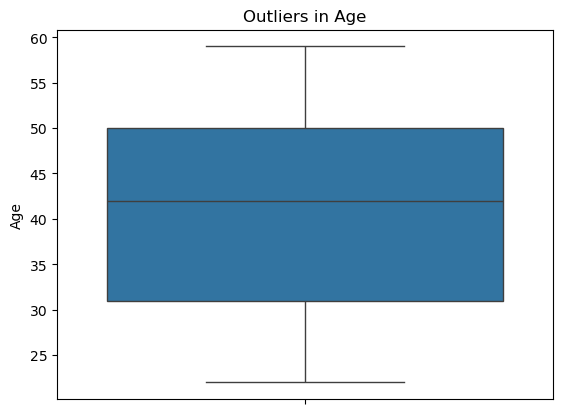

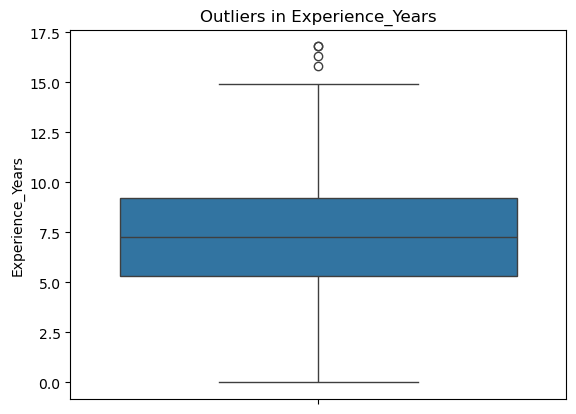

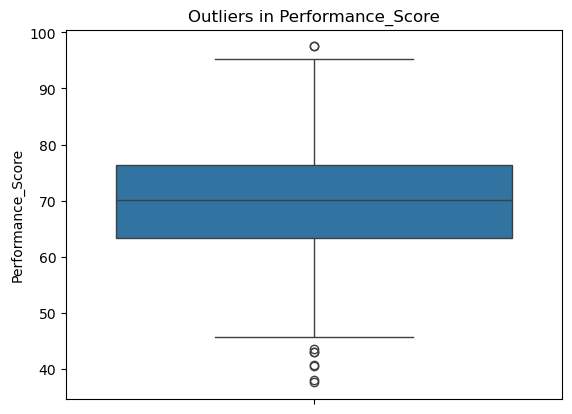

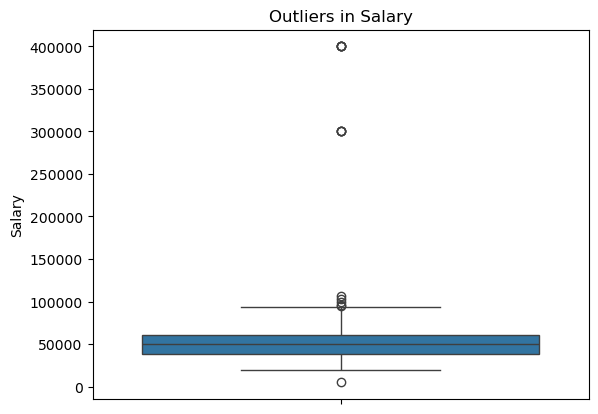

In [12]:
numeric_cols = ['Age', 'Experience_Years', 'Performance_Score', 'Salary']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')s
    plt.show()


No significant difference is observed after handling the outliers,so no handling outliers

In [13]:
for i in df.columns:
    print(i,':-')
    print(df[i].unique())

Age :-
[49 55 29 30 58 46 56 24 22 33 36 27 54 59 48 31 47 40 26 50 53 32 35 43
 52 25 45 39 41 57 34 42 44 51 38 23 28 37]
Gender :-
['Female' 'Male']
Department :-
['Operations' 'Sales' 'IT' 'Marketing' 'HR' 'Finance']
Experience_Years :-
[ 5.6   5.5  10.7   9.8  11.5   2.3   9.7   6.5   3.3   6.    7.5   4.6
 10.6   6.3  12.6  10.4   4.5   7.25  7.3   9.    5.2   8.7   7.1   8.9
  3.7   7.6   9.9   3.4   8.2   4.3   1.    7.2   7.4   9.1   2.4   4.8
  7.7   3.5   8.    2.5   5.7   6.2   8.6  10.    2.1   3.8  13.5   6.9
  5.   12.5   8.4   9.5   1.9  10.3   6.7   7.9  11.2   5.4   9.3   6.1
  5.3   1.7   0.1   9.2   8.5   3.9   3.6  13.9  10.1   5.9  13.    7.8
  4.4  10.8   8.8   3.1   9.6   2.7   5.8  13.1  11.7   0.6   5.1   9.4
 14.9   0.   11.8  12.4   8.3  14.5  12.    2.8  12.1   3.    6.4  11.
 12.3  12.8  14.4   0.5   6.6  12.2  10.9   0.3  11.3   4.9   6.8   4.7
  4.1  11.9  10.2  12.9   4.    8.1   7.   14.6  11.1  13.7  11.4  10.5
  4.2  14.3  13.8   1.5   2.9  13.2   0.

<div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        Data Visualisation
    </h2>
</div>

# HIST PLOT

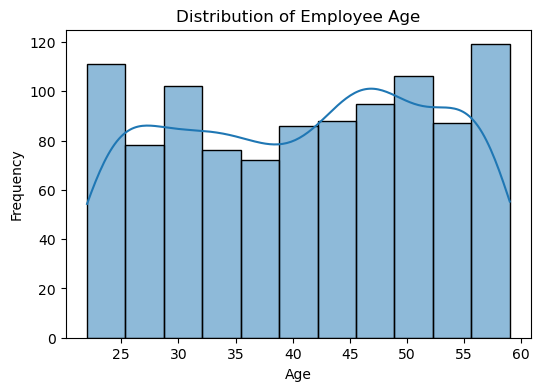

In [63]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Employee Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* The organization has a well-balanced age distribution, 
* with employees spread across early, mid, and late career stages,
* and a strong presence of experienced (40–50 years) employees.

## COUNT PLOT

C:\Users\RASHID\AppData\Local\Temp\ipykernel_6652\610920387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='Set2')


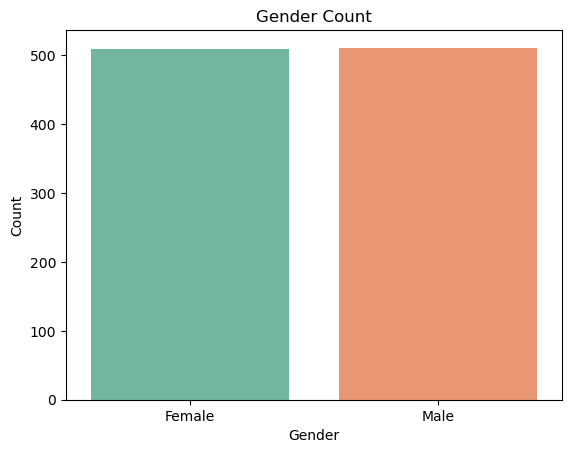

In [15]:
sns.countplot(x=df['Gender'], palette='Set2')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The counts of males (500) and females (500) are equal

## BAR PLOT

<Axes: xlabel='Department', ylabel='Performance_Score'>

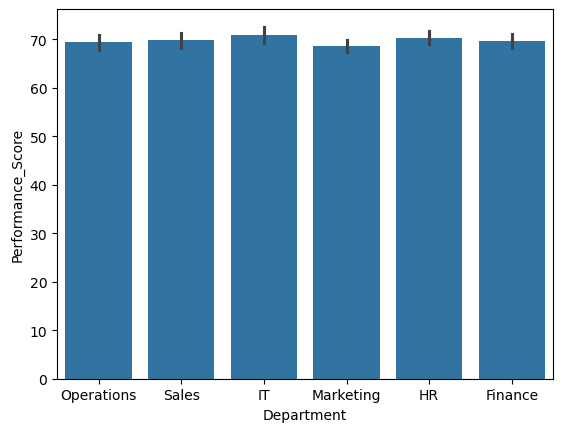

In [16]:
sns.barplot(x='Department',y='Performance_Score',data=df)

* Performance scores are fairly consistent across departments

* IT and HR departments show slightly higher average performance

* Marketing shows a slightly lower average score

* No department shows extreme under-performance

## COUNT PLOT

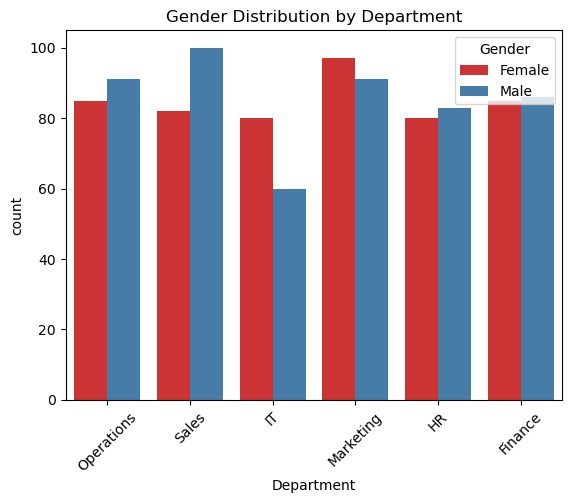

In [17]:
sns.countplot(
    x='Department', hue='Gender',
    data=df, palette='Set1'
)
plt.title('Gender Distribution by Department')
plt.xticks(rotation=45)
plt.show()




* How many males and females are in each department.

* Example: In Sales, there are more males than females. In Marketing, females are slightly more than males.

## VIOLIN PLOT

<Axes: xlabel='Gender', ylabel='Performance_Score'>

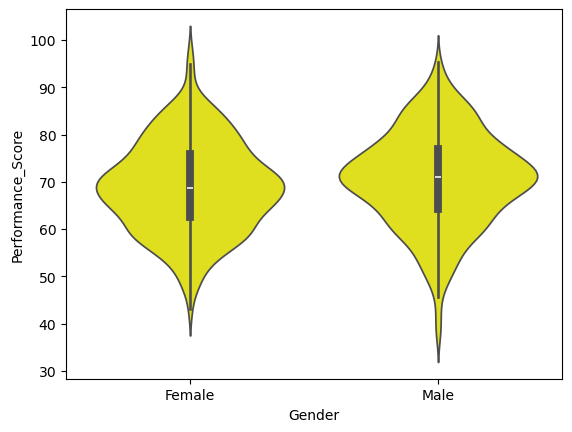

In [18]:
sns.violinplot(x='Gender',y='Performance_Score',data=df,color='yellow')

* Both genders have similar performance score distributions

* Median scores are close, indicating no major gender performance gap

* Males show a slightly wider spread at higher scores

* No extreme outliers dominate performance

## HEAT MAP

<Axes: >

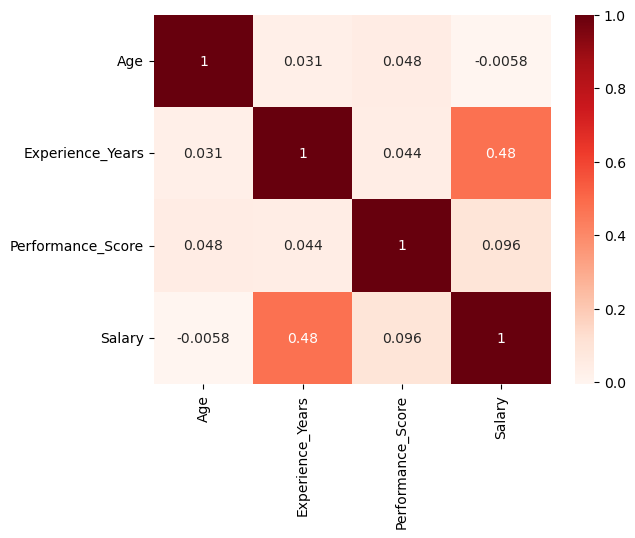

In [19]:
colss=['Age', 'Experience_Years','Performance_Score', 'Salary']
dt=df[colss].corr()
sns.heatmap(dt,annot=True,cmap='Reds')

Experience_Year and salary exhibit a positive correlation.

# PAIR PLOT

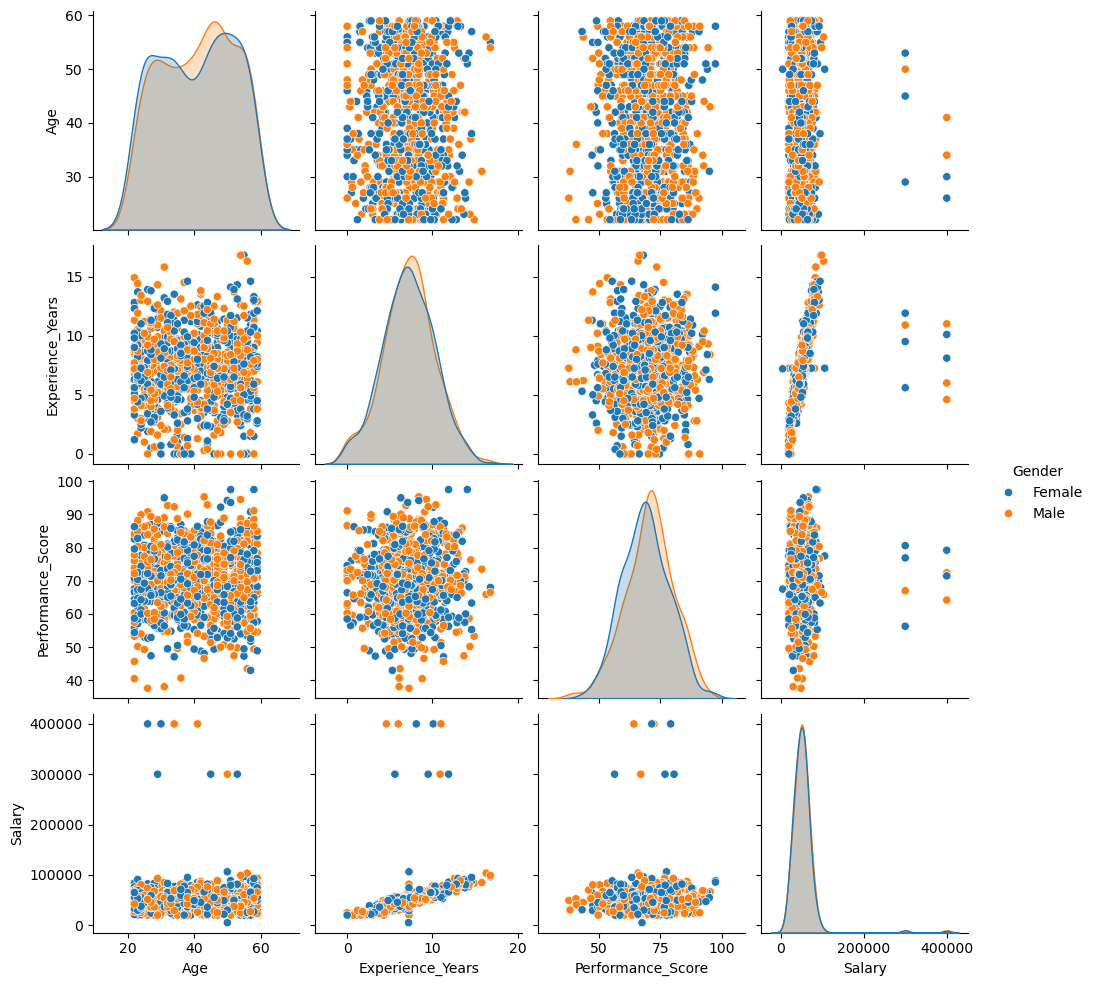

In [20]:
sns.pairplot(df,hue='Gender')

* Salary generally increases with experience

* Age and experience are positively related

* Performance scores cluster around a central range

* Outliers in salary are clearly visible

* Gender overlap suggests similar patterns across genders

<div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
        STATISTICAL ANALYSIS
    </h2>
</div>



# Kolmogorov–Smirnov (K–S) Test

* H0: Age and Experienceyears ,both samples have similar distributions
* H1:  Age and Experienceyears ,both samples have  different  distributions

In [21]:
Age = np.array(df['Age'])
Experience_Years = np.array(df[
  'Experience_Years'
])


In [22]:
ks_stat, p_value = stats.ks_2samp(Age, Experience_Years)


In [23]:
print(f"K-S Statistic = {ks_stat}")
print(f"p-value = {p_value}")

K-S Statistic = 1.0
p-value = 0.0


In [24]:
alpha =0.05
if p_value > alpha:
    print("Decision: Fail to reject H0")
    print("Conclusion: Both samples have similar distributions")
else:
    print("Decision: Reject H0")
    print("Conclusion: The distributions are different(fail to reject H0)")

Decision: Reject H0
Conclusion: The distributions are different(fail to reject H0)


**The K–S test shows that Age and Experience_Years come from completely different distributions, so we reject the null hypothesis. This is expected since they measure different quantities on different scales.**

# ZTEST

* H0: There is no significant difference in mean salary between male and female salary
* H1: There is  significant difference in mean salary between male and female salary


In [25]:
male_salary = df[df['Gender']=='Male']['Salary']
female_salary = df[df['Gender']=='Female']['Salary']

z_statistic, p_value = ztest(male_salary, female_salary)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)


Z-statistic: 0.20272582667589806
P-value: 0.8393493355414766


In [26]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis,ignificant difference in mean salary between male and female salary")
else:
    print("Fail to Reject H0,no significant difference in mean salary between male and female salary")

Fail to Reject H0,no significant difference in mean salary between male and female salary


**The Z-test indicates no statistically significant difference in mean salary between male and female employees, as the p-value is greater than 0.05**

# TTEST

###  TWO TAILED T- TEST

* H0: There is no significant difference in mean performance between male and female performancescire
* H0: There is significant difference in mean performance between male and female performancescire

In [27]:
male_Performance  = df[df['Gender']=='Male']['Performance_Score']
female_Performance= df[df['Gender']=='Female']['Performance_Score']

t_stat, p_value = ttest_ind(male_Performance, female_Performance)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 0.20272582667589806
P-value: 0.008740092215316474


In [28]:
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference exists.


### ONE TAILED T- TEST

* H0: Performancescore male <= performance female so,no diiference
* H1: performacescore of male> performace score of femaleso have difference

In [29]:
one_tailed_p = p_value / 2
if t_stat > 0 and one_tailed_p < 0.05:
    print("Reject the null hypothesis.")
else:
 print("Fail to reject the null hypothesis.")


Reject the null hypothesis.


Two-tailed T-test: Shows that male and female performance scores are different, but not which is higher.

One-tailed T-test: Shows that male performance is significantly higher than female performance.


# CHI-SQUARE TEST(X2)

* H0: no statistically significant association between Gender or Department and Salary
* H1: statistically significant association between Gender or Department and Salary

In [30]:
categorical_cols=['Gender','Department']

In [31]:
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Salary'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and Salary.")
    else:
        print(f"There is no statistically significant association between {col} Salary.")
    print("\n")
for i in categorical_cols:
    contingency_table = pd.crosstab(df[i], df['Performance_Score'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    if p_val < 0.05:
        print(f"There is a statistically significant association between {i} and Salary(Reject H₀).")
    else:
        print(f"There is no statistically significant association between {i} Salary(Fail to reject H₀).")
    print("\n")

Chi2 Statistic: 964.7331208501379
P-value: 0.37120657598331813
There is no statistically significant association between Gender Salary.


Chi2 Statistic: 4849.599563501132
P-value: 0.16589211525818254
There is no statistically significant association between Department Salary.


Chi2 Statistic: 402.15000551987623
P-value: 0.057669150572982865
There is no statistically significant association between Gender Salary(Fail to reject H₀).


Chi2 Statistic: 1797.2489637543506
P-value: 0.4806011255163296
There is no statistically significant association between Department Salary(Fail to reject H₀).





**The chi-square tests indicate no statistically significant association between gender or department and salary or performance score, meaning these variables are independent in the dataset.**

# ANOVA 

* H0: Department and Salary, there significant  group means are equal
* H1: Department and Salary, there significant  group means are not equal

In [32]:
anova_data = df[['Department', 'Salary']]

In [33]:
groups = anova_data.groupby('Department')['Salary'].apply(list)

In [34]:
groups

Department
Finance       [32165.0, 62705.0, 22332.0, 51174.0, 56583.0, ...
HR            [38576.0, 47076.0, 46085.0, 45765.0, 29528.0, ...
IT            [45430.0, 83020.0, 39050.0, 56560.0, 23265.0, ...
Marketing     [45616.0, 63726.0, 62767.0, 39064.0, 59270.0, ...
Operations    [33013.0, 65750.0, 53311.0, 49196.0, 68305.0, ...
Sales         [42640.0, 72180.0, 74830.0, 25481.0, 72051.0, ...
Name: Salary, dtype: object

In [35]:
f_statistic, p_value = stats.f_oneway(*groups)

In [36]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 2.0432253476588778
P-value: 0.0702921809317482


In [37]:
if p_value < 0.05:
    print("There are significant mean differences between the groups( reject H0).")
else:
    print("There are no significant mean  differences between the groups(fail to reject H0).")

There are no significant mean  differences between the groups(fail to reject H0).


**The one-way ANOVA indicates a statistically significant difference in mean salaries across departments, as the p-value is less than 0.05.**

# FTEST

##### Encoding 

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col1=['Gender','Department']
for i in col1:
    df[i] = le.fit_transform(df[i])

In [39]:
x=df.drop('Salary',axis=1)

In [40]:
x

,Age,Gender,Department,Experience_Years,Performance_Score
0,49,0,4,5.6,67.80
1,55,0,5,5.5,70.05
2,29,0,5,10.7,68.80
3,30,0,4,9.8,70.05
4,58,1,5,11.5,72.80
...,...,...,...,...,...
1015,26,1,2,9.2,83.90
1016,40,0,0,4.8,77.40
1017,47,1,4,2.0,76.50
1018,57,1,1,1.8,55.70


In [41]:
y=df['Salary']

In [42]:
y

0       33013.0
1       42640.0
2       72180.0
3       65750.0
4       74830.0
         ...   
1015    51410.0
1016    48858.0
1017    24647.0
1018    26744.0
1019    53764.0
Name: Salary, Length: 1020, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model=model.fit(x_train,y_train)

In [46]:
y_pred=model.predict(x_test)

* H0: The Model is not significant at the 5% significane level
* H1: the model is  significant at the 5% significance level

In [47]:
n = len(y_test)  
p = x_train.shape[1]  

In [48]:
n

255

In [49]:
p

5

In [50]:
RSS=np.sum((y_test-y_pred)**2)

In [51]:
TSS=np.sum((y_test-np.mean(y_test))**2)

In [52]:
ESS=TSS-RSS

In [53]:
MSE=RSS/(n-p-1)

In [54]:
MSR=ESS/p

In [55]:
f_statistic=MSR/MSE

In [56]:
p_value=1-stats.f.cdf(f_statistic,p,n-p-1)

In [57]:
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 20.153372359807836
p-value: 1.1102230246251565e-16


In [58]:
if p_value<0.05:
    print('The Model is significant at the 5% significane level(reject H0)')
else:
    print('the model is not significant at the 5% significance level(fail to  reject H0)')

The Model is significant at the 5% significane level(reject H0)


In [59]:
MSE

np.float64(696550944.5247668)

In [60]:
mse=mean_squared_error(y_test,y_pred)
mse

680161510.5359488

In [61]:
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.2880972236213031


**The regression model is statistically significant, but it explains only about 29% of the variation in salaries, indicating that additional factors affect salary beyond Age, Gender, Department, Experience, and Performance_Score**

<div style="background-color: #1F618D; padding: 15px; text-align: center; border-radius: 8px; margin-top: 20px;">
    <h2 style="color: #FFFFFF; font-family: Arial, sans-serif; margin: 0;">
    Overview of Employee Performance
</div>


> **in this project, we obtained a clear understanding of the organization’s workforce structure, performance, and salary patterns. The data shows a balanced age and gender distribution with equal numbers of males and females and a strong presence of experienced employees. Performance levels are generally consistent across departments, with slight variations but no extreme under-performance. Salary is strongly influenced by experience and department, while gender does not significantly affect salary. Statistical tests and visualizations confirm these patterns and show that additional factors beyond the analyzed variables also impact salary. Overall, the file provides reliable insights for workforce analysis and decision-making.**

#  Conclusion 

 > ***The analysis shows a balanced workforce with equal numbers of males and females and a strong presence of experienced employees, especially in the 40–50 age group. Performance levels are stable across departments, with IT and HR performing slightly better and no department showing extreme under-performance. Salary increases with experience and varies significantly by department, while gender does not have a significant impact on salary. Statistical tests support these findings and indicate that other factors beyond the analyzed variables also influence salary. Overall, the dataset is clean, reliable, and provides clear insights into employee performance and compensation patterns.****
